In [2]:
import pytesseract
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np


In [3]:
def show(img):
    rgb_img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
    plt.imshow(rgb_img)
    plt.show()

In [35]:
highway = cv.imread('./highway.jpg')

show(highway)

In [43]:

result = pytesseract.image_to_string(highway)
print(result)

  
 
  
  

  

= EAST

(jg) Sout )
Las Vegas

   
 

Gan @&
Salt Lake

   
   
    

  
   

Timpanogos
Highway



In [56]:
gray_img = cv.cvtColor(highway, cv.COLOR_BGR2GRAY)
ret,threshold_img = cv.threshold(gray_img,150,255,cv.THRESH_BINARY + cv.THRESH_OTSU)

kernel = np.ones((3,3),np.uint8)
morphed_img = cv.morphologyEx(threshold_img,cv.MORPH_OPEN,kernel)

cv.imwrite('./threshold_highway.jpg',morphed_img)
show(morphed_img)



In [33]:
blue,green,red = cv.split(highway)

show(red)

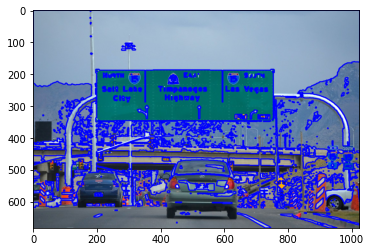

In [58]:
# blue,green,red = cv.split(morphed_img)
contours1, hierarchy1 = cv.findContours(image=morphed_img,mode=cv.RETR_TREE, method=cv.CHAIN_APPROX_NONE)

copied_img = highway.copy()
cv.drawContours(image=copied_img, 
    contours=contours1, contourIdx=-1, color=(255, 0, 0), thickness=2, lineType=cv.LINE_AA)

show(copied_img)

In [15]:

morphed_result = pytesseract.image_to_string(morphed_img)
print(morphed_result)

    
     
 
 
 

    
  
  
  

  
 
 
 
   

NORTH a5) ey EAST
Salt Lake Timpanogos
City Highway

 



In [20]:
boxes = pytesseract.image_to_boxes(morphed_img)


boxed_image = highway.copy()
for box in boxes.splitlines():
    box = box.split(' ')
    h = morphed_img.shape[0]
    boxed_image = cv.rectangle(boxed_image, 
        (int(box[1]), h - int(box[2])), 
        (int(box[3]), h - int(box[4])), 
        255, 1)
cv.imwrite('./boxed.jpg',boxed_image)

True